In [2]:
%matplotlib inline
# from pycocotools.coco import COCO
import numpy as np
# import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [1189]:
image_directory = 'apples/train/apples_train2022/'
annotation_file = 'apples/train/instances_apple_train2022.json'

In [1190]:
example_coco = COCO(annotation_file)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [1191]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
skin flesh

Custom COCO supercategories: 
shape


In [1192]:
category_ids = example_coco.getCatIds(catNms=['square'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [1193]:
image_data


{'id': 57,
 'file_name': '10000061.jpg',
 'width': 1024,
 'height': 1024,
 'date_captured': '2022-07-15 03:52:44.711565',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

0

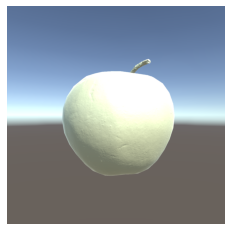

In [1194]:
# load and display instance annotations
import os

image = io.imread(os.path.join(image_directory, image_data['file_name']))
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

[[ 29  29  29 ...  29  29  29]
 [ 29  29  29 ...  29  29  29]
 [ 29  29  29 ...  29  29  29]
 ...
 [ 29  29  29 ...  29  29 255]
 [ 29  29  29 ...  29 255 255]
 [ 29  29  29 ... 255 255 255]]
Image Size: (1024, 1024)


TypeError: 'int' object does not support item assignment

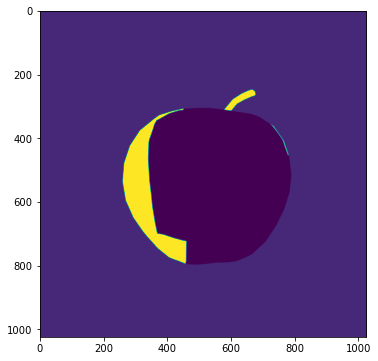

In [7]:
from PIL import Image
image = Image.open('/Users/cosmos/Documents/EmPRISE/peeling/apples/train/annotations/10000024_flesh_1240001.png').convert('L')
plt.figure(figsize=(8, 6))
plt.imshow(image)
# plt.show()
image = np.array(image)
print(image[300:350,300:350])
image = np.array(image)
print(f"Image Size: {image.shape}")


image[image > 29] = 255
image[image < 29] = 1
image[image == 29] = 0
image[image == 255] = 2
print(f"1 Unique Values: {np.unique(image)}")

# image[image == 0] = 1
# image[image == -1] = 255

plt.figure(figsize=(8, 6))
plt.imshow(image)

# image = Image.open('/Users/cosmos/Downloads/apple_peeling/25/Mask.png')
# image = np.array(image)
# print(np.unique(image))
# image[image > 0] = 255
# print(np.unique(image))
# image = Image.fromarray(image)
# plt.figure(figsize=(8, 6))
# plt.imshow(image)
# plt.show()